In [2]:
import pandas as pd
ds = pd.read_excel('/content/Seeds_dataset.xlsx')

ds.head(10)
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter                210 non-null    float64
 2   Compactness              210 non-null    float64
 3   Length of kernel         210 non-null    float64
 4   Width of kernel          210 non-null    float64
 5   Asymmetry coefficient    210 non-null    float64
 6   Length of kernel groove  210 non-null    float64
 7   Class (Variety)          210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [3]:
ds.head()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class (Variety)
0,15.26,14.84,0.8710,5763.0,3312.0,2221.0,5.22,1
1,14.88,14.57,0.8811,5554.0,3333.0,1018.0,4956.00,1
2,14.29,14.09,0.9050,5291.0,3337.0,2699.0,4825.00,1
3,13.84,13.94,0.8955,5324.0,3379.0,2259.0,4805.00,1
4,16.14,14.99,0.9034,5658.0,3562.0,1355.0,5175.00,1


In [4]:
X = ds.drop(['Area', 'Perimeter'], axis=1)

X.head()

,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class (Variety)
0,0.8710,5763.0,3312.0,2221.0,5.22,1
1,0.8811,5554.0,3333.0,1018.0,4956.00,1
2,0.9050,5291.0,3337.0,2699.0,4825.00,1
3,0.8955,5324.0,3379.0,2259.0,4805.00,1
4,0.9034,5658.0,3562.0,1355.0,5175.00,1


In [5]:
from sklearn.cluster import KMeans

clusters = []
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

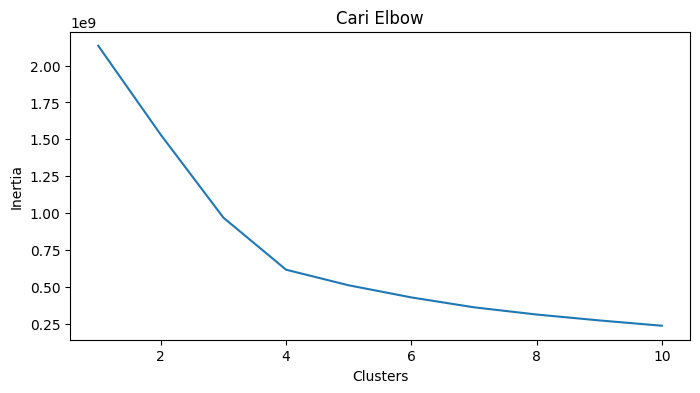

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [7]:
km5 = KMeans(n_clusters=5).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [8]:
X['Labels'] = km5.labels_

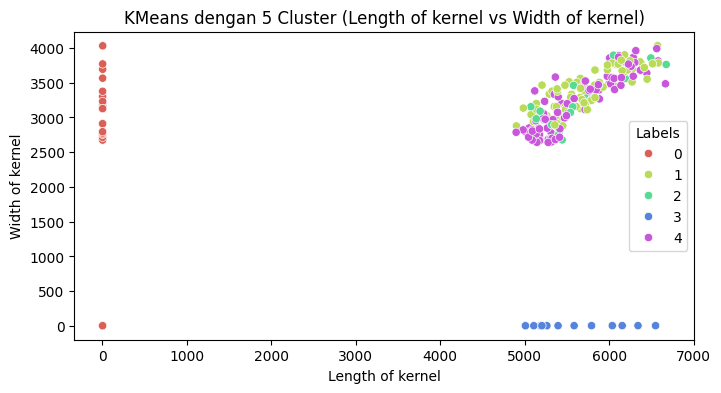

In [9]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=X['Length of kernel'], y=X['Width of kernel'], hue=X['Labels'], palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster (Length of kernel vs Width of kernel)')
plt.show()

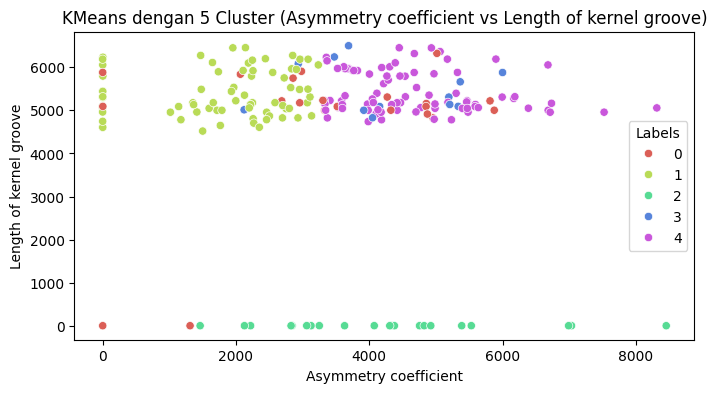

In [10]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=X['Asymmetry coefficient'], y=ds['Length of kernel groove'], hue=X['Labels'], palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster (Asymmetry coefficient vs Length of kernel groove)')
plt.show()

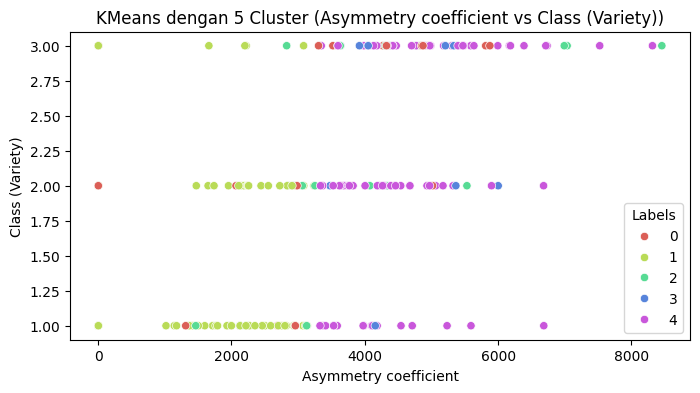

In [11]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=X['Asymmetry coefficient'], y=X['Class (Variety)'], hue=X['Labels'], palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster (Asymmetry coefficient vs Class (Variety))')
plt.show()

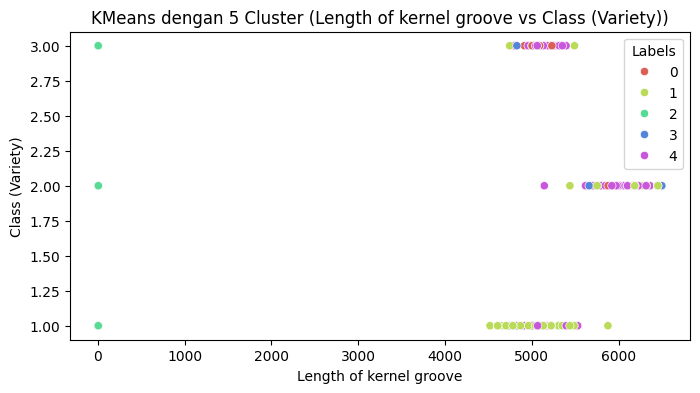

In [12]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=X['Length of kernel groove'], y=ds['Class (Variety)'], hue=X['Labels'], palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster (Length of kernel groove vs Class (Variety))')
plt.show()

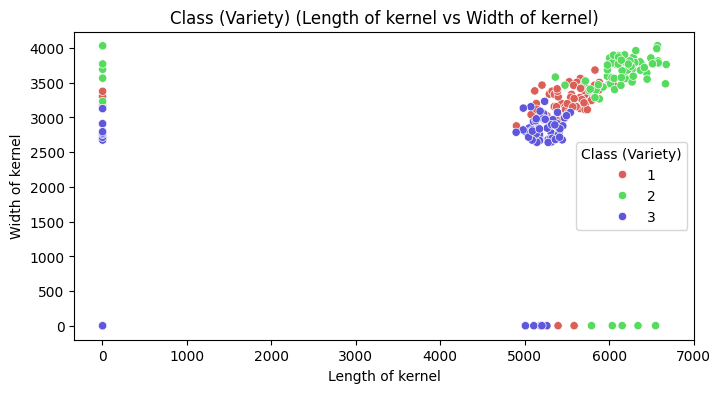

In [13]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=X['Length of kernel'], y=X['Width of kernel'], hue=X['Class (Variety)'], palette=sns.color_palette('hls', 3))
plt.title('Class (Variety) (Length of kernel vs Width of kernel)')
plt.show()

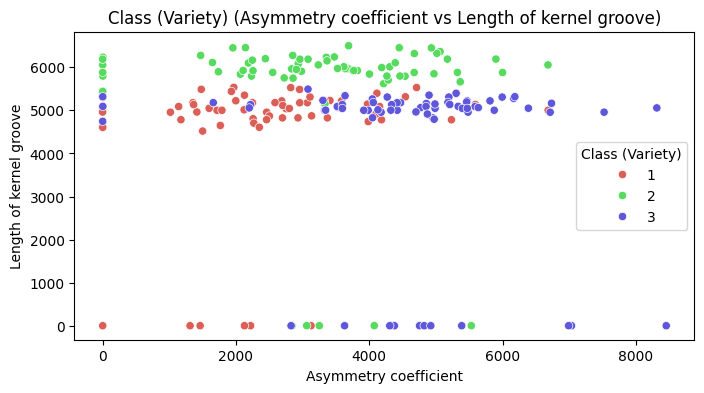

In [14]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=X['Asymmetry coefficient'], y=X['Length of kernel groove'], hue=X['Class (Variety)'], palette=sns.color_palette('hls', 3))
plt.title('Class (Variety) (Asymmetry coefficient vs Length of kernel groove)')
plt.show()